# The numpy.random Package
***

### 1. Purpose of the package
***
NumPy is a high-performance multidimensional array library. A Numpy array is a grid of values of the same type, and is indexed by a tuple of positive integers. The standard Python library provides lists, which is the Python equivalent of a NumPy array, but is resizeable and can contain elements of different types. NumPy data structures perform better in terms of size, performance and functionality. [Ref: Python lists vs numpy arrays] numpy.random is a subpackage of NumPy which offers a suite of functions based on pseudorandom number generation. [Ref: Random number generator using NumPy] It contains some simple random data generation methods, permutation and distribution functions, and random generator functions. 

A random number does not mean generating a different number each time, but rather something that cannot be logically predicted. If a computer programme exists that can generate a random number, it can be predicted, and therefore it is not truly random. Random numbers generated using an algorithm are referred to as pseudorandom numbers. [Ref: Random numbers in NumPy] Pseudorandomness is a sample of numbers that appear to be randomly generated, but were in fact generated using a deterministic process (i.e. a probability distribution). They are generated in a sequence that is seeded with an initial number. The value of this seed is irrelevant. However, what is important to note is that the same seeding of the process will result in the same sequence of random numbers. [Ref: How to generate random numbers] An explanation of the use of seeds in generating pseudorandom numbers will be given in Section 5.

The first step is to import the NumPy library as well as the other libraries required in the subsequent sections.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The function below shows how a new Generator is constructed. It has one parameter which creates a seed to initialise the BitGenerator. In this instance, the seed is set to 123. If no seed is passed, then fresh, unpredictable entropy will be pulled from the OS. [Ref: Generator] The default BitGenerator used by Generator is PCG64, which will be discussed in more detail in Section 5.

In [2]:
# Construct a new Generator
rng = np.random.default_rng(123)
print(rng)

Generator(PCG64)


The following sections will explain the use of the "Simple random data" and "Permutations" functions, explain the use and purpose of eight "Distributions" functions, and explain the use of seeds in generating pseudorandom numbers.

<br>

### 2. Simple random data functions
***
There are four simple random data functions in the numpy.random package. These are:

1. integers()
2. random()
3. choice()
4. bytes()

#### 2.1. integers(low[, high, size, dtype, endpoint])

This function returns random integers from *low* (inclusive) to *high* (exclusive), or if ```endpoint=True```, *low* (inclusive) to *high* (inclusive). This replaces the RandomState.randint and RandomState.random_integers functions in the previous version of the API documentation. [Ref: numpy.random.Generator.integers] The function below returns an array comprising 15 intergers between two and 12. By setting ```endpoint=True```, the default setting is overwritten and the number 12 is now inclusive in the output.

In [3]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random integers
rng.integers(2, 12, size=15, endpoint=True)

array([ 4,  8, 12,  5,  2, 10,  4,  8, 12,  3, 10,  4,  9,  8, 11],
      dtype=int64)

If no value is given for *high*, this results in an array ranging from 0 to the *low* value as shown below. In this instance, ```endpoint=False``` is the default, therefore the *low* value of five is excluded.

In [6]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random integers
rng.integers(5, size=15)

array([4, 0, 0, 0, 2, 4, 3, 3, 4, 2, 4, 4, 1, 0, 2], dtype=int64)

A tuple of integers can also be passed to the *size* parameter. In the example below, an array of size 50 x 20 x 40 is returned. As ```endpoint=True```, the *low* value is included. The results are from the "discrete uniform" distribution, which is also known as the "equally likely outcomes" distribution. [Ref: Discrete uniform distribution]

In [4]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays of integers
ax = rng.integers(30, size=(50,20,40), endpoint=True)
ay = rng.integers(40, size=(50,20,40), endpoint=True)
az = rng.integers(50, size=(50,20,40), endpoint=True)
# Print the first array
print(ax)

[[[11 17  2 ...  4  0 22]
  [15  1 21 ... 16 24 24]
  [ 3 20 11 ... 27 23  0]
  ...
  [24 24 30 ... 10 26 17]
  [20 21 11 ... 30 15 28]
  [ 2 12  8 ...  4 16  0]]

 [[14 21 27 ... 14 30 24]
  [ 7  4  8 ... 28  8 23]
  [ 9 26 17 ... 22 11 20]
  ...
  [12 27  9 ... 12  9 17]
  [12 24 12 ...  4 21  9]
  [14 21 13 ... 14 18 14]]

 [[ 1  2  8 ... 29 12  4]
  [10  9 27 ... 17  3 12]
  [17 23 10 ... 15  7 27]
  ...
  [ 8 11  5 ... 26  3 18]
  [ 3 27 23 ... 28 23 26]
  [15 29  6 ...  9  9 30]]

 ...

 [[ 6 20  4 ...  4  0 16]
  [ 1  0 26 ... 14  3 18]
  [ 6 26 18 ...  8  6 28]
  ...
  [13  8 27 ... 29 17  6]
  [11 12 17 ... 11  8 10]
  [21 16 16 ...  6 10 26]]

 [[14  8 17 ... 18 29  4]
  [22 16 28 ...  5 30  1]
  [ 2 27 19 ... 10  0 28]
  ...
  [14  2  8 ... 11 11  1]
  [18 19  5 ... 30  9  8]
  [14  1  8 ... 24 19 18]]

 [[19 28  1 ... 19 12 11]
  [13 28 29 ...  9 12 18]
  [ 8 18 29 ... 24 19 29]
  ...
  [ 8  9 29 ... 14 14 16]
  [28 14  3 ... 22 28 28]
  [13  2 12 ... 21 16 26]]]


It is clear from the two plots below that the probability density is almost equal for each integer in each case. 

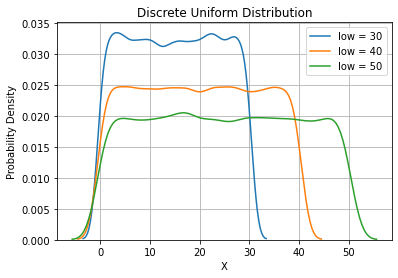

In [43]:
# Create a plot of each array, but exclude histogram
sns.distplot(ax, label="low = 30", hist=False)
sns.distplot(ay, label="low = 40", hist=False)
sns.distplot(az, label="low = 50", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Discrete Uniform Distribution")
plt.grid()

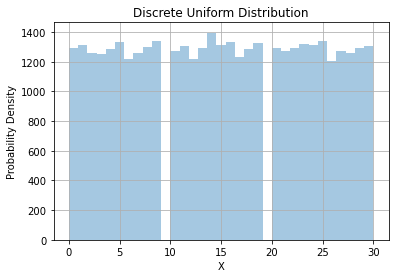

In [6]:
# Plot a histogram of the array
sns.distplot(ax, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Discrete Uniform Distribution")
plt.grid()

#### 2.2 random([size, dtype, out])

This function returns random floats in the half-open interval [0.0, 1.0). A half-open (or half-closed) interval is an interval in which one endpoint is included, but not the other. It is denoted [a, b) or (a, b]. [Ref: Half-closed interval][Ref: Interval] In this instance, $0.0≤x<1.0$. The function below returns a 3 x 4 x 5 array of floats between 0.0 (inclusive) and 1.0 (exclusive).

In [8]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
rng.random((3,4,5))

array([[[0.19920885, 0.02403795, 0.88614416, 0.18714961, 0.3594861 ],
        [0.33344799, 0.66021243, 0.63881802, 0.6755921 , 0.86120127],
        [0.97212823, 0.52493476, 0.98222648, 0.33720169, 0.58806846],
        [0.35739611, 0.73664666, 0.76756509, 0.66837753, 0.64348795]],

       [[0.33182447, 0.79144662, 0.99226151, 0.0908233 , 0.82068958],
        [0.23334708, 0.75452699, 0.58877237, 0.60999502, 0.4634692 ],
        [0.77483757, 0.55857151, 0.94051069, 0.60499259, 0.38310943],
        [0.36689105, 0.28698513, 0.17437021, 0.25943046, 0.424413  ]],

       [[0.14696997, 0.57269791, 0.8344694 , 0.85257896, 0.58510135],
        [0.06638645, 0.45344294, 0.21961704, 0.16846247, 0.39074012],
        [0.01723644, 0.26431813, 0.01417847, 0.46849805, 0.1487992 ],
        [0.75144575, 0.89571496, 0.72082075, 0.6835454 , 0.08205255]]])

The function below returns an array of 500 floats between 0.0 and 1.0. The results are from the "continuous uniform" distribution over the stated interval, and therefore the mean of these numbers is approximpately 0.5. [Ref: numpy.random.Generator.random][Ref: Generating random numbers in NumPy] 

In [9]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
b = rng.random(1000)
# Print the array
print(b)

[0.62387403 0.90654032 0.55403899 0.35098793 0.10439398 0.47210793
 0.02660915 0.28476153 0.60315685 0.5262162  0.53602599 0.89221379
 0.77195158 0.45683971 0.36866363 0.26518879 0.6171607  0.38738629
 0.35167074 0.80794802 0.26971011 0.4675759  0.94931621 0.8278436
 0.05443343 0.18000766 0.97479429 0.13741823 0.22517223 0.87527003
 0.24235009 0.43016609 0.70089774 0.21026159 0.64759595 0.16593648
 0.64070212 0.66060811 0.32867048 0.96584833 0.71644246 0.59805294
 0.1941947  0.81061785 0.63351719 0.70717166 0.49713233 0.86819893
 0.62841938 0.87546306 0.45303123 0.27746031 0.1528412  0.00498705
 0.07296096 0.30472556 0.13155669 0.72657362 0.72439287 0.31700166
 0.01315437 0.88461362 0.7360419  0.45291619 0.72610142 0.04175507
 0.71413244 0.8393938  0.88323276 0.78531314 0.9814015  0.82740906
 0.67457172 0.6267836  0.16161018 0.81681385 0.29868207 0.02024884
 0.24990832 0.85983132 0.05291212 0.93902949 0.66747601 0.65110044
 0.8821428  0.50357624 0.21409346 0.46695576 0.21596343 0.73426

The ```numpy.mean()``` function can be used to get the mean of the array, which will be approximately 0.5. [Ref: numpy.mean] Graphically, the probability density function is portrayed almost as a rectangle as per the plot below as the probability density is approximately 1.0 for each bin. [Ref: Continuous uniform distribution]

In [10]:
# Get the mean of the array
np.mean(b)

0.49698197246876524

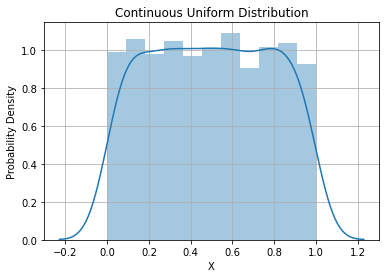

In [11]:
# Create a plot of the array
sns.distplot(b)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Continuous Uniform Distribution")
plt.grid()

#### 2.3. choice(a[, size, replace, p, axis, shuffle])

This function generates a random sample from a given 1-D array. [Ref: numpy.random.Generator.choice] The function below returns an array comprising four intergers between 1 and 10 (exclusive). If an integer is given, a random integer is returned from ```numpy.arange(a)```. The subsequent example returns a value between 0 (inclusive) and 10 (exclusive) as values are generated within the half open interval [start, stop). [Ref: numpy.arange]

In [13]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of integers between 1 and 10 (exclusive)
rng.choice(10, 4)

array([3, 6, 9, 3], dtype=int64)

In [79]:
# Construct a new Generator
rng = np.random.default_rng()
# Return a value between 0 and 10 (exclusive)
rng.choice(10)

7

The function can also be used to select a random item from a list as per below. [Ref: Random choice]

In [18]:
# Construct a new Generator
rng = np.random.default_rng()
# Create a list
numberList = [111, 222, 333, 444, 555]
# Output a random value from the list
print(rng.choice(numberList))

555


A tuple of integers can also be passed to the *size* parameter. In the example below, an array of size 3 x 2 x 3 is returned. The values are between 0 (inclusive) and 18 (exclusive). By setting ```replace=False```, no integer is repeated in the output. An error would occur if the input was less than 18 in this case, as there would not be enough unique integers. [Ref: Replacement]

In [21]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of unique values
c = rng.choice(18, size=[3,2,3], replace=False)
print(c)

[[[ 0  9 14]
  [ 8  6  1]]

 [[ 7 15  2]
  [ 4 12  3]]

 [[17 16  5]
  [13 11 10]]]


#### 2.4. bytes(length)

This function returns random bytes as a string. [Ref: numpy.random.Generator.bytes] The function below returns five bytes. The subsequent example outputs 10 rows of bytes increasing in length by one byte with each iteration. [Ref: Bytes]

In [22]:
# Construct a new Generator
rng = np.random.default_rng()
# Return five random bytes
rng.bytes(5)

b'\x91\n\xab\xe8\xf3'

In [105]:
# Construct a new Generator
rng = np.random.default_rng()
# Output a string of bytes, incrementing by 1 each time
for length in range(10):
    print(length, ": ", rng.bytes(length))

0 :  b''
1 :  b'\xea'
2 :  b'\x18>'
3 :  b'9E\x8c'
4 :  b'\xa2\\\x8f\xcd'
5 :  b'\xa7\xdbi\xd6\x11'
6 :  b'\x92\xac\x0e\xb4\xf5\xb4'
7 :  b'\xd3\xac\x91\x06\xc4\xa8\x9f'
8 :  b'\xc2\xb2\xcc\xdb\x1d\x06\xd3H'
9 :  b'\x93\xccm\x10\xb9\xbaa2m'


<br>

### 3 Permutations functions
***
There are two permutation functions in the numpy.random package. These are:

1. shuffle()
2. permutation()

#### 3.1. shuffle(x[, axis])

This function modifies a sequence in-place by shuffling its contents. [Ref: numpy.random.Generator.shuffle] The function below takes a list of sequential integers as input and reorganises the items.  

In [24]:
# Construct a new Generator
rng = np.random.default_rng()
# Create a list of integers
shuffle_lst = [1, 2, 3, 4, 5]
# Shuffle the values in the list
rng.shuffle(shuffle_lst)
# Print the shuffled list
print(shuffle_lst)

[1, 5, 4, 2, 3]


The function below returns an array of size 3 x 3 x 2 with values between 0.0 and 1.0. The subsequent code shuffles the order of the first axis only, while the order of the others remain unchanged.

In [8]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array of random floats
shuffle_array = rng.random((3,3,2))
# Print array
print(shuffle_array)

[[[0.39570634 0.15183977]
  [0.81606087 0.77591722]
  [0.17798403 0.6646734 ]]

 [[0.03071581 0.16532189]
  [0.37033868 0.23727184]
  [0.38508155 0.79769079]]

 [[0.59241222 0.99105766]
  [0.17957832 0.0144459 ]
  [0.93079959 0.51576939]]]


In [9]:
# Shuffle the array
rng.shuffle(shuffle_array)
# Print the shuffled array
print(shuffle_array)

[[[0.39570634 0.15183977]
  [0.81606087 0.77591722]
  [0.17798403 0.6646734 ]]

 [[0.03071581 0.16532189]
  [0.37033868 0.23727184]
  [0.38508155 0.79769079]]

 [[0.59241222 0.99105766]
  [0.17957832 0.0144459 ]
  [0.93079959 0.51576939]]]


#### 3.2. permutation(x[, axis])

This function randomly permutes a sequence, or returns a permuted range. The difference between this and the ```shuffle()``` function is that ```permutation()``` returns a re-arranged array while leaving the original array unchanged. [Ref: Random permutation]

In [31]:
# Construct a new Generator
rng = np.random.default_rng()
# Create an array
perm_array = [1, 2, 3, 4, 5]
# Print the permuted array
print("Permuted array: ", rng.permutation(perm_array))
# Print the original array
print("Original array: ", perm_array)

Permuted array:  [4 2 3 1 5]
Original array:  [1, 2, 3, 4, 5]


If passed an integer, the function will return a shuffled range as shown below. [Ref: Shuffle vs Permute] An error would occur if ```shuffle()``` was used instead.

In [11]:
# Output a shuffled array of values in the range 0-9
rng.permutation(10)

array([0, 3, 4, 9, 8, 6, 5, 7, 2, 1])

<br>

### 4. Distributions functions
***
There are 35 distribution functions in the numpy.random package. Eight of these are:

1. chisquare()
2. exponential()
3. geometric()
4. gumbel()
5. lognormal()
6. normal()
7. rayleigh()
8. triangular()

In each case, the “empirical cumulative distribution function” (ECDF) is used to visualise and compare each distribution. In an ECDF, the x-axis corresponds to the range of values for variables and the y-axis shows the proportion of data points that are less than are equal to corresponding x-axis value. [Ref: ECDF] The ECDF is useful as it approximates the true CDF well if the sample size is large, and knowing the distribution is helpful for statistical inference. The resulting plot can be visually compared to known CDFs to check if the data originated from one of those frequently used distributions. It can also illustrate “how fast” the CDF increases to 1. [Ref: Conceptual foundations of ECDF]

#### 4.1. chisquare(df[, size])

This function draws samples from a chi-square distribution, and helps in understanding the relationship between two categorical variables. It helps to compare what is observed with what is expected, and is used as a basis to verify the hypothesis. [Ref: Chi-squared test] It has two parameters: *df* (degree of freedom) and *size* (the shape of the returned array). [Ref: Chi-square distribution] The degree of freedom must be greater than zero and is broadly defined as the number of "observations" in the data that are free to vary when estimating statistical parameters. [Ref: What are degrees of freedom in statistics?]

The test can be expressed as:

$x^{2} = \sum\frac{(O-E)^{2}}{E}$

where *O* is the number of observed events and *E* is the number of expected events under the null hypothesis.

The function below creates three 30 x 60 arrays with different degrees of freedom.

In [13]:
# Construct a new Generator
rng = np.random.default_rng()
# Create three arrays with different degrees of freedom
dx = rng.chisquare(df=20, size=(30,60))
dy = rng.chisquare(df=60, size=(30,60))
dz = rng.chisquare(df=100, size=(30,60))

The ECDF of the distribution shows how each distribution concentrates around the degree of freedom along the x-axis. This is expected as the mean of this particular type of distribution is its degree of freedom. The points in the array with the lowest degree of freedom (10) look much more condensed than those in the array with the highest degree of freedom (100).

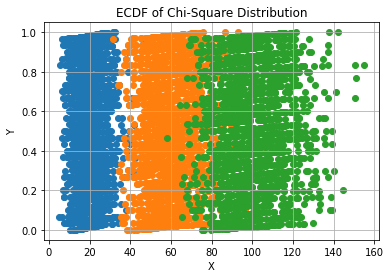

In [14]:
# Create a sorted copy of the array
x= np.sort(dx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(dy)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(dz)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Chi-Square Distribution")
plt.grid()

The plot below shows how the probability density peaks at approximately the *df* value on the x-axis of each distribution. [Ref: Comparing frequencies] The distribution is also wider along the x-axis and shorter along the y-axis as the degree of freedom increases. Chi-Square distributions are positively skewed, with the degree of skew decreasing as the degree of freedom increases. [Ref: Chi-Square distribution 2] It is clear from the plot that as the degree of freedom increases, the Chi-Square distribution begins to look like a normal distribution.

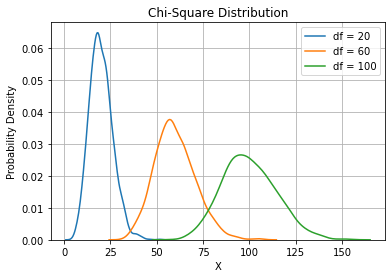

In [15]:
# Plot the three arrays with different degrees of freedom
sns.distplot(dx, label="df = 20", hist=False)
sns.distplot(dy, label="df = 60", hist=False)
sns.distplot(dz, label="df = 100", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Chi-Square Distribution")
plt.grid()

Again, the histogram below shows how the data concentrates around the degree of freedom along the x-axis (a *df* of 20 in this case).

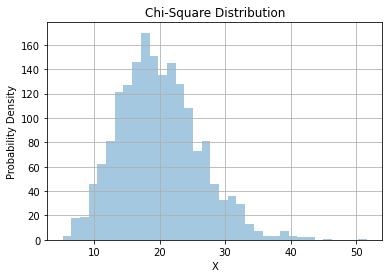

In [16]:
# Plot a histogram of the array
sns.distplot(dx, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Chi-Square Distribution")
plt.grid()

#### 4.2. exponential([scale, size])

This function draws samples from an exponential distribution, which is used for describing the time until the next event e.g. failure/success etc. [Ref: Random exponential] It is closely related to the poisson distribution, which helps answer questions such as the number of events that occur in an interval of time. On the other hand, an exponential distrubution answers the time taken between two events occuring. It has two parameters: *scale* and *size*. The *scale* parameter must be non-negative.

The probability density function can be expressed as:

$f(x; \frac{1}{\beta}) = \frac{1}{\beta} exp(-\frac{x}{\beta})$

for x > 0 and 0 elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$. [Ref: numpy.random.Generator.exponential]

The function below creates three 10 x 20 arrays with different scales.

In [19]:
# Create three arrays with different scales
ex = rng.exponential(scale=1, size=(10, 20))
ey = rng.exponential(scale=2, size=(10, 20))
ez = rng.exponential(scale=3, size=(10, 20))

The ECDF of the distribution shows how each distribution concentrates around 0 on the x-axis, with very few higher values for x. Arrays with a larger scale value results in more higher values along the x-axis.

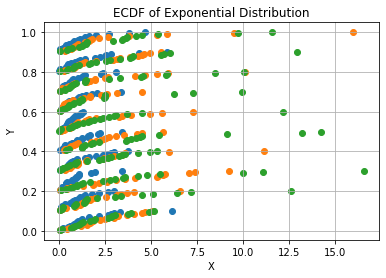

In [20]:
# Create a sorted copy of the array
x = np.sort(ex)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(ey)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(ez)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Exponential Distribution")
plt.grid()

The plot below shows how the probability density is much higher at a smaller scale and tapers off quite quickly for higher values of x. The peaks of the other two arrays are much lower. 

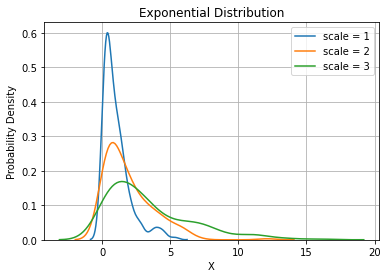

In [14]:
# Plot the three arrays with different scales
sns.distplot(ex, label="scale = 1", hist=False)
sns.distplot(ey, label="scale = 2", hist=False)
sns.distplot(ez, label="scale = 3", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Exponential Distribution")
plt.grid()

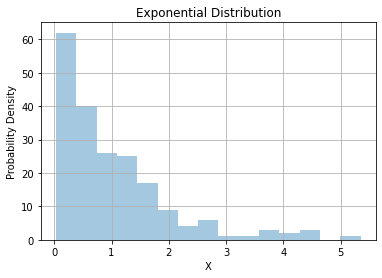

In [29]:
# Plot a histogram of the array
sns.distplot(ex, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Exponential Distribution")
plt.grid()

#### 4.3. geometric(p[, size])

This function draws samples from the geometric distribution. A Bernoulli trial is a random experiment with exactly two possible outcomes, "success" and "failure" (e.g. flipping a coin), in which the probability of success is the same every time the experiment is conducted. [Ref: Bernoulli trial] The geometric distribution models the number of trials that must be run in order to achieve success. It takes two parameters: *p* and *size*.

The probability mass function of the geometric distribution can be expressed as:

$f(k) = (1 - p)^{k-1}p$

where *k* is a positive integer and *p* is the probability of success of an individual trial where $0<p≤1$. [Ref: Geometric distribution]

The function below creates three arrays of the same size with different probabilities of success.

In [29]:
# Create three arrays with different probabilities of success
fx = rng.geometric(p=0.3, size=1000)
fy = rng.geometric(p=0.5, size=1000)
fz = rng.geometric(p=0.7, size=1000)

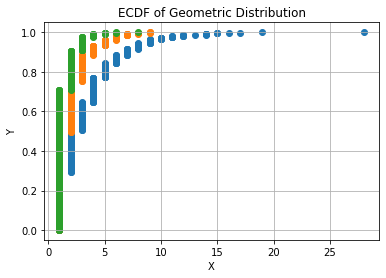

In [30]:
# Create a sorted copy of the array
x = np.sort(fx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(fy)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(fz)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Geometric Distribution")
plt.grid()

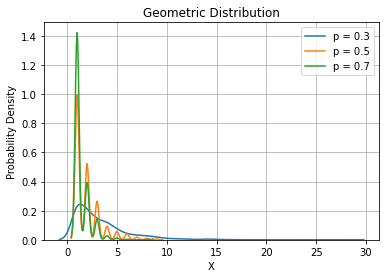

In [31]:
# Plot the three arrays with different probabilities of success
sns.distplot(fx, label="p = 0.3", hist=False)
sns.distplot(fy, label="p = 0.5", hist=False)
sns.distplot(fz, label="p = 0.7", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Geometric Distribution")
plt.grid()

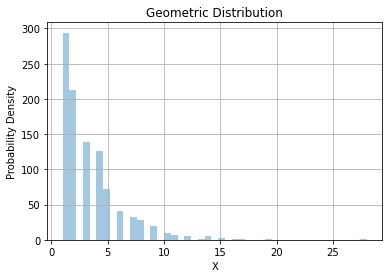

In [32]:
# Plot a histogram of the array
sns.distplot(fx, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Geometric Distribution")
plt.grid()

#### 4.4. normal([loc, scale, size])

This function draws samples from a normal (Gaussian) distribution. It is one of the most important distributions and fits the probability distribution of many events, e.g. IQ scores, heartbeat etc.

It has three parameters:
loc - (Mean) where the peak of the bell exists
scale - (Standard Deviation) how flat the graph distribution should be.
size - the shape of the returned array [Ref: Normal (Gaussian) distribution]

(http://justinbois.github.io/bootcamp/2020/lessons/l23_random_number_generation.html)

In [100]:
# Create three arrays with different mean values
gx = rng.normal(loc=0, scale=2, size=(10, 30))
gy = rng.normal(loc=5, scale=2, size=(10, 30))
gz = rng.normal(loc=10, scale=2, size=(10, 30))

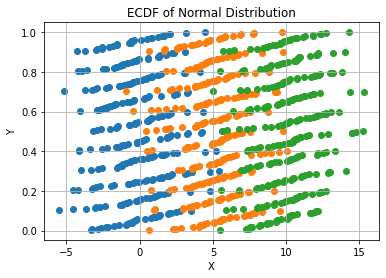

In [203]:
# Create a sorted copy of the array
x = np.sort(gx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(gy)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(gz)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Normal Distribution")
plt.grid()

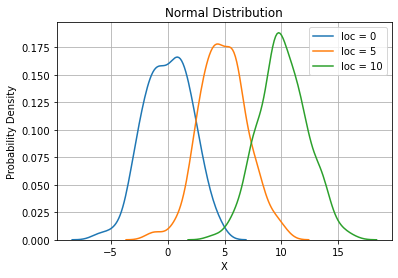

In [59]:
# Plot the three arrays with different mean values
sns.distplot(gx, label="loc = 0", hist=False)
sns.distplot(gy, label="loc = 5", hist=False)
sns.distplot(gz, label="loc = 10", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Normal Distribution")
plt.grid()

In [98]:
# Create three arrays with different scales
gx_a = rng.normal(loc=0, scale=2, size=(10, 30))
gy_b = rng.normal(loc=0, scale=4, size=(10, 30))
gz_c = rng.normal(loc=0, scale=6, size=(10, 30))

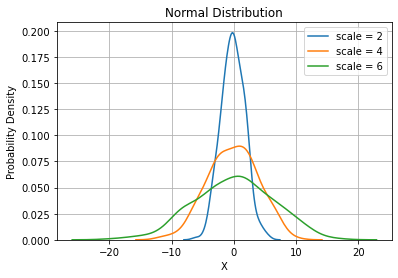

In [99]:
# Plot the three arrays with different scales
sns.distplot(gx_a, label="scale = 2", hist=False)
sns.distplot(gy_b, label="scale = 4", hist=False)
sns.distplot(gz_c, label="scale = 6", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Normal Distribution")
plt.grid()

#### 4.5. rayleigh([scale, size])

This function draws samples from a Rayleigh distribution. Rayleigh distribution is used in signal processing. It has two parameters, scale and size. [Ref: Random rayleigh]

In [37]:
# Create three arrays with different scales
hx = rng.rayleigh(scale=2, size=(10, 30))
hy = rng.rayleigh(scale=4, size=(10, 30))
hz = rng.rayleigh(scale=6, size=(10, 30))

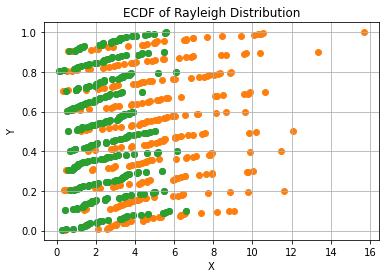

In [204]:
# Create a sorted copy of the array
x = np.sort(hx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(hy)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(hx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Rayleigh Distribution")
plt.grid()

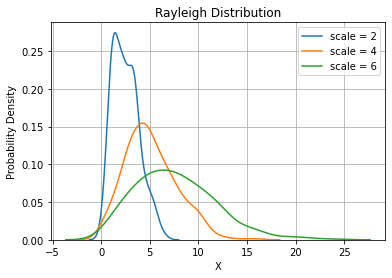

In [97]:
# Plot the three arrays with different scales
sns.distplot(hx, label="scale = 2", hist=False)
sns.distplot(hy, label="scale = 4", hist=False)
sns.distplot(hz, label="scale = 6", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Rayleigh Distribution")
plt.grid()

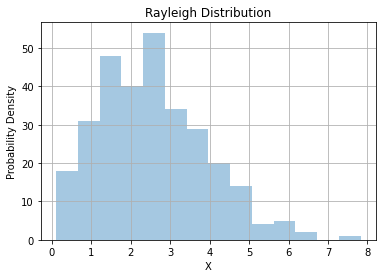

In [39]:
# Plot a histogram of the array
sns.distplot(hx, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Rayleigh Distribution")
plt.grid()

#### 4.6. standard_t(df[, size])

This function draws samples from a standard Student's t distribution with *df* degrees of freedom.

In [41]:
# Create three arrays with different degrees of freedom
ix = rng.standard_t(10, 100)
iy = rng.standard_t(50, 100)
iz = rng.standard_t(100, 100)

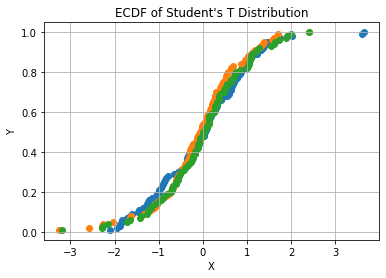

In [229]:
# Create a sorted copy of the array
x = np.sort(ix)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(iy)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(iz)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Student's T Distribution")
plt.grid()

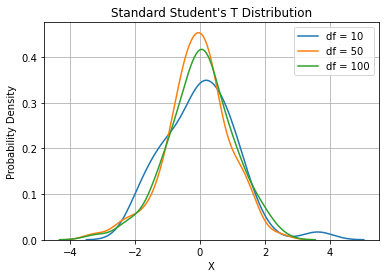

In [230]:
# Plot the three arrays with different degrees of freedom
sns.distplot(ix, label="df = 10", hist=False)
sns.distplot(iy, label="df = 50", hist=False)
sns.distplot(iz, label="df = 100", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Standard Student's T Distribution")
plt.grid()

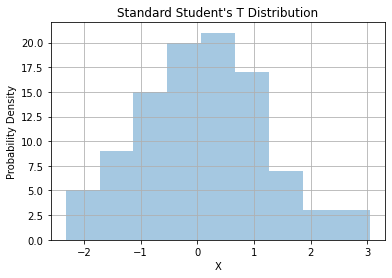

In [43]:
# Plot a histogram of the array
sns.distplot(ix, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Standard Student's T Distribution")
plt.grid()

#### 4.7. triangular(left, mode, right[, size])

This function draws samples from the triangular distribution over the interval ```[left, right]```. The function returns a random floating number between the two specified numbers, but a third parameter (the mode) can also be specified.

In [45]:
# Create three arrays with different intervals
jx = rng.standard_t(10, 50)
jy = rng.standard_t(50, 50)
jz = rng.standard_t(90, 50)

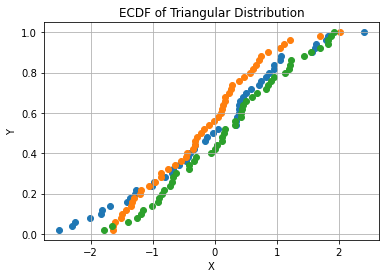

In [213]:
# Create a sorted copy of the array
x = np.sort(jx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(jy)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(jz)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("ECDF of Triangular Distribution")
plt.grid()

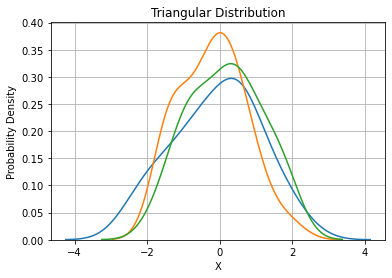

In [214]:
# Plot the three arrays with different intervals
sns.distplot(jx, hist=False)
sns.distplot(jy, hist=False)
sns.distplot(jz, hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Triangular Distribution")
plt.grid()

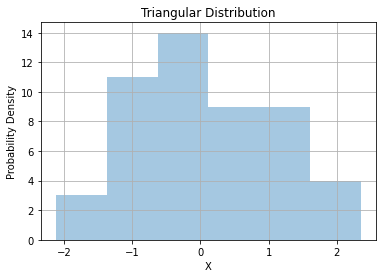

In [47]:
# Plot a histogram of the array
sns.distplot(jx, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Triangular Distribution")
plt.grid()

#### 4.8. uniform([low, high, size])

This function draws samples from a uniform distribution. It returns a random floating number between two specified numbers (both inclusive). [Ref: Random uniform]

In [48]:
# Create three arrays with different intervals
kx = rng.uniform(40, 30, 100)
ky = rng.uniform(60, 30, 100)
kz = rng.uniform(80, 30, 100)

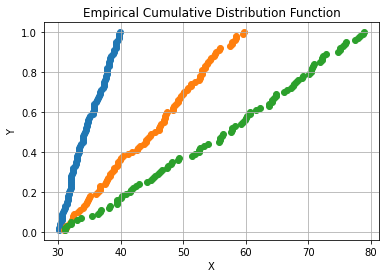

In [219]:
# Create a sorted copy of the array
x = np.sort(kx)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(ky)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

# Create a sorted copy of the array
x = np.sort(kz)
# Count the number of elements along the x-axis
n = x.size
# Calculate the proportion of data points less than each data point
y = np.arange(1, n+1) / n
# Create a plot of the array
plt.scatter(x=x, y=y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Empirical Cumulative Distribution Function")
plt.grid()

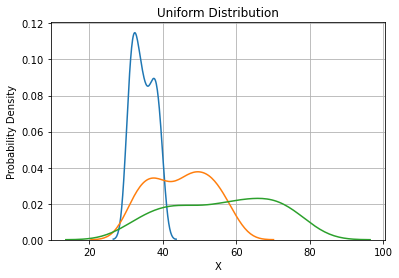

In [217]:
# Plot the three arrays with different intervals
sns.distplot(kx, hist=False)
sns.distplot(ky, hist=False)
sns.distplot(kz, hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Uniform Distribution")
plt.grid()

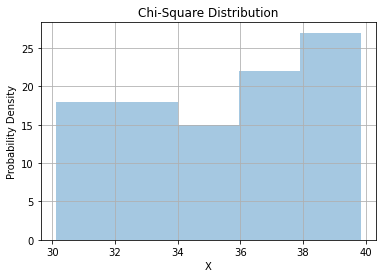

In [51]:
# Plot a histogram of the array
sns.distplot(kx, kde=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Chi-Square Distribution")
plt.grid()

<br>

### 5. Seeds
***
A random seed is a number used to initialise a pseudorandom number generator. The number sequence of this generator is completely determined by the seed, and therefore if the generator is reinitialised with the same seed, it will produce the same sequence of numbers. [Ref: Random seed]

As of version 1.17.3 of NumPy, the algorithm used to call random number generator functions such as np.random.normal() was the Mersenne Twister. It has been a widely used and reliable means of random number generation. However, in the latest version, the numpy.random module offers random number generators with better statistical performance than the legacy MT19937 used in RandomState, with the default set to the PCG64 generator. By calling default_rng(), a new instance of a Generator is obtained, providing access to a wide range of distributions. [Ref: Random generator]
 
A permuted congruential generator (PCG) applies an output permutation function to improve the statistical properties of a modulo-$2^n$ linear congruential generator with small and fast code, and small state size.
PCG64 is a 128-bit implementation of O'Neill's permuted congruential generator. PCG-64 has a period of $2^{128}$ and supports advancing an arbitrary number of steps. Random variates are generated by permuting the output of a 128-bit LCG. [Ref: PCG64]

To demonstrate that random number generation is deterministic, the code below will explicitly seed the random number generator to 500 to illustrate that the same random numbers are generated.

In [174]:
# Construct a new Generator
rng = np.random.default_rng(seed=500)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=10)

array([0.56674314, 0.85397799, 0.6453572 , 0.41115681, 0.46803194,
       0.82136122, 0.31252317, 0.78622079, 0.43555016, 0.24763021])

When the code is run again, but with an additional five floats, the random number sequence of the first 10 floats is exactly the same.

In [34]:
# Construct a new Generator
rng = np.random.default_rng(seed=500)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=15)

array([0.56674314, 0.85397799, 0.6453572 , 0.41115681, 0.46803194,
       0.82136122, 0.31252317, 0.78622079, 0.43555016, 0.24763021,
       0.44214554, 0.89695158, 0.5570242 , 0.52864422, 0.27598204])

If a different seed is used, completely different random numbers are generated.

In [36]:
# Construct a new Generator
rng = np.random.default_rng(seed=501)
# Create a random uniform distribution comprising 10 floats
rng.uniform(size=10)

array([0.99642636, 0.63956651, 0.41891136, 0.55933685, 0.86131897,
       0.9933856 , 0.07328868, 0.82888267, 0.15211456, 0.72558062])

In [120]:
from numpy.random import default_rng

rg = default_rng(12345)
rg.random()

0.22733602246716966

In [121]:
from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()

0.37786929937474845

<br>

### 6. References
***
Bernoulli trial: https://en.wikipedia.org/wiki/Bernoulli_trial

Bytes: https://pyprog.pro/random_sampling_functions/bytes.html

Chi-square distribution: https://www.w3schools.com/python/numpy_random_chisquare.asp

Chi-square distribution 2: http://onlinestatbook.com/2/chi_square/distribution.html

Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test

Comparing frequencies: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717_ComparingFrequencies/PH717_ComparingFrequencies2.html

Conceptual foundations of ECDF: https://chemicalstatistician.wordpress.com/2013/06/24/exploratory-data-analysis-conceptual-foundations-of-empirical-cumulative-distribution-functions/

Continuous uniform distribution: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

Discrete uniform distribution: https://mathworld.wolfram.com/DiscreteUniformDistribution.html

ECDF: https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/

Generator: https://numpy.org/doc/stable/reference/random/generator.html

Geometric distribution: https://en.wikipedia.org/wiki/Geometric_distribution

Half-closed interval: https://mathworld.wolfram.com/Half-ClosedInterval.html

How to generate random numbers: https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

Interval: https://en.wikipedia.org/wiki/Interval_(mathematics)#Including_or_excluding_endpoints

Normal (Gaussian) distribution: https://www.w3schools.com/python/numpy_random_normal.asp

numpy.arange: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

numpy.mean: https://numpy.org/doc/stable/reference/generated/numpy.mean.html

numpy.random.Generator.bytes: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html

numpy.random.Generator.choice: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

numpy.random.Generator.exponential: https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

numpy.random.Generator.integers: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html

numpy.random.Generator.random: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

numpy.random.Generator.shuffle: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html

PCG64: https://bashtage.github.io/randomgen/bit_generators/pcg64.html

Python lists vs numpy arrays: https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference

Random choice: https://pynative.com/python-random-choice/

Random exponential: https://www.w3schools.com/python/numpy_random_exponential.asp

Random generator: https://docs.w3cub.com/numpy~1.17/random/generator/

Random number generator using NumPy: https://www.datacamp.com/community/tutorials/numpy-random

Random numbers in NumPy: https://www.w3schools.com/python/numpy_random.asp

Random permutation: https://www.w3schools.com/python/numpy_random_permutation.asp

Random rayleigh: https://www.w3schools.com/python/numpy_random_rayleigh.asp

Random seed: https://en.wikipedia.org/wiki/Random_seed

Random uniform: https://www.w3schools.com/python/ref_random_uniform.asp

Replacement: https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice

Shuffle vs Permute: https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

What are degrees of freedom in statistics?: https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics